<a href="https://colab.research.google.com/github/RocioLiu/TensorFlow_Specialization/blob/master/tf_spec_c2CNN_w2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cats v Dogs Augmentation

Let's start with a model that's very effective at learning Cats v Dogs.

It's similar to the previous models that you have used, but I have updated the layers definition. Note that there are now 4 convolutional layers with 32, 64, 128 and 128 convolutions respectively.

Also, this will train for 100 epochs, because I want to plot the graph of loss and accuracy.

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-07-12 01:25:10--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 2607:f8b0:4001:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   102MB/s    in 0.6s    

2019-07-12 01:25:11 (102 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
#import shutil
#shutil.rmtree('/tmp/cats_and_dogs_filtered') 

In [0]:
import os
import tensorflow as tf
import zipfile
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [0]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir, # This is the source directory for training images
    target_size = (150,150),
    batch_size = 20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode = 'binary'
)

# Flow validation images in batches of 20 using vlidation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, # This is the source directory for vlidation images
    target_size = (150,150),
    batch_size = 20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,  # 2000 images = batch_size * steps
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,  # 1000 images = batch_size * steps
    verbose = 1)

Epoch 1/100
100/100 [==============================] - 110s 1s/step - loss: 0.6910 - acc: 0.5280 - val_loss: 0.6744 - val_acc: 0.5810
Epoch 2/100
100/100 [==============================] - 109s 1s/step - loss: 0.6505 - acc: 0.6325 - val_loss: 0.6534 - val_acc: 0.6200
Epoch 3/100
100/100 [==============================] - 109s 1s/step - loss: 0.6083 - acc: 0.6745 - val_loss: 0.6474 - val_acc: 0.6180
Epoch 4/100
100/100 [==============================] - 110s 1s/step - loss: 0.5620 - acc: 0.7215 - val_loss: 0.5729 - val_acc: 0.6910
Epoch 5/100
100/100 [==============================] - 110s 1s/step - loss: 0.5319 - acc: 0.7335 - val_loss: 0.5507 - val_acc: 0.7200
Epoch 6/100
100/100 [==============================] - 109s 1s/step - loss: 0.4941 - acc: 0.7620 - val_loss: 0.5514 - val_acc: 0.7250
Epoch 7/100
100/100 [==============================] - 108s 1s/step - loss: 0.4622 - acc: 0.7780 - val_loss: 0.5276 - val_acc: 0.7260
Epoch 8/100
100/100 [==============================] - 109s 1s

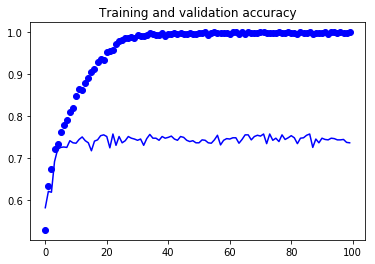

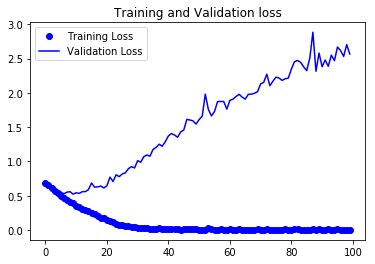

In [28]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation loss')

plt.legend()

plt.show()

The Training Accuracy is close to 100%, and the validation accuracy is in the 70%-80% range. This is a great example of overfitting -- which in short means that it can do very well with images it has seen before, but not so well with images it hasn't. Let's see if we can do better to avoid overfitting -- and one simple method is to augment the images a bit. If you think about it, most pictures of a cat are very similar -- the ears are at the top, then the eyes, then the mouth etc. Things like the distance between the eyes and ears will always be quite similar too. 

What if we tweak with the images to change this up a bit -- rotate the image, squash it, etc.  That's what image augementation is all about. And there's an API that makes it easy...

Now take a look at the ImageGenerator. There are properties on it that you can use to augment the image. 

```
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
```
These are just a few of the options available (for more, see the Keras documentation. Let's quickly go over what we just wrote:

* rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
* width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* shear_range is for randomly applying shearing transformations.
* zoom_range is for randomly zooming inside pictures.
* horizontal_flip is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
* fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.


Here's some code where we've added Image Augmentation. Run it to see the impact.

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
  

In [0]:
import os
import zipfile
import tensorflow as tf
from tnesorflow..keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [0]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [37]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
      train_dir,
      target_size=(150,150),
      batch_size=20,
      # Since we use binary_crossentropy loss, we need binary labels
      class_mode='binary')

# Flow training images in batches of 20 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
      validation_dir,
      target_size=(150,150),
      batch_size=20,
      # Since we use binary_crossentropy loss, we need binary labels
      class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [41]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,   # 2000 images = batch_size * steps
      epochs=30,
      validation_data = validation_generator,
      validation_steps = 50, # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/30
100/100 [==============================] - 120s 1s/step - loss: 0.6466 - acc: 0.6195 - val_loss: 0.6271 - val_acc: 0.6060
Epoch 2/30
100/100 [==============================] - 118s 1s/step - loss: 0.6343 - acc: 0.6275 - val_loss: 0.5892 - val_acc: 0.6870
Epoch 3/30
100/100 [==============================] - 117s 1s/step - loss: 0.6236 - acc: 0.6495 - val_loss: 0.6103 - val_acc: 0.6530
Epoch 4/30
100/100 [==============================] - 117s 1s/step - loss: 0.6137 - acc: 0.6585 - val_loss: 0.5977 - val_acc: 0.6630
Epoch 5/30
100/100 [==============================] - 118s 1s/step - loss: 0.6056 - acc: 0.6595 - val_loss: 0.6225 - val_acc: 0.6470
Epoch 6/30
100/100 [==============================] - 118s 1s/step - loss: 0.5947 - acc: 0.6830 - val_loss: 0.5575 - val_acc: 0.7110
Epoch 7/30
100/100 [==============================] - 117s 1s/step - loss: 0.5878 - acc: 0.6785 - val_loss: 0.5774 - val_acc: 0.6830
Epoch 8/30
100/100 [==============================] - 117s 1s/step - 

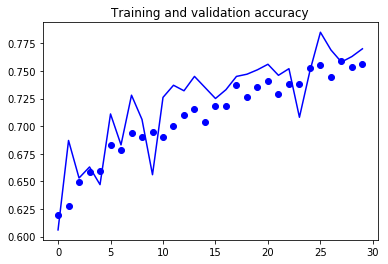

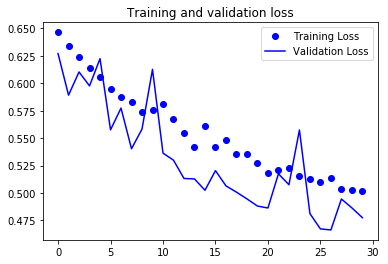

In [42]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Use **dropout** in the model to improve the performence:

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
  

In [0]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSporp
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [0]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5), # adding dropout layer here !!!!
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range = 40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
      )

validation_datagen = ImageDataGenerator(rescale=1./255)

In [49]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
      train_dir,
      target_size=(150,150),
      batch_size=20,
      # Since we use binary_crossentropy loss, we need binary labels
      class_mode='binary')

# Flow training images in batches of 20 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
      validation_dir,
      target_size=(150,150),
      batch_size=20,
      # Since we use binary_crossentropy loss, we need binary labels
      class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [51]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

Epoch 1/30
100/100 [==============================] - 116s 1s/step - loss: 0.6956 - acc: 0.5055 - val_loss: 0.7070 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 117s 1s/step - loss: 0.6864 - acc: 0.5460 - val_loss: 0.6842 - val_acc: 0.5540
Epoch 3/30
100/100 [==============================] - 118s 1s/step - loss: 0.6783 - acc: 0.5610 - val_loss: 0.6499 - val_acc: 0.6160
Epoch 4/30
100/100 [==============================] - 118s 1s/step - loss: 0.6688 - acc: 0.5805 - val_loss: 0.6702 - val_acc: 0.5290
Epoch 5/30
100/100 [==============================] - 118s 1s/step - loss: 0.6551 - acc: 0.6060 - val_loss: 0.6122 - val_acc: 0.6610
Epoch 6/30
100/100 [==============================] - 116s 1s/step - loss: 0.6471 - acc: 0.6035 - val_loss: 0.5950 - val_acc: 0.6810
Epoch 7/30
100/100 [==============================] - 117s 1s/step - loss: 0.6366 - acc: 0.6325 - val_loss: 0.5907 - val_acc: 0.6970
Epoch 8/30
100/100 [==============================] - 117s 1s/step - 

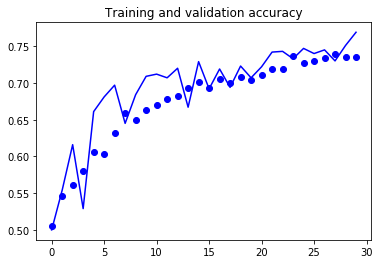

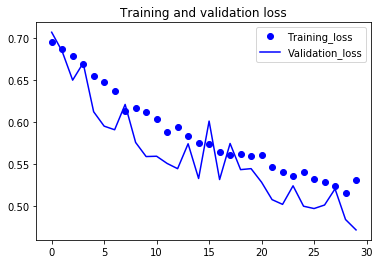

In [52]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training_accracy')
plt.plot(epochs, val_acc, 'b', label='Validation_accuracy')
plt.title('Training and validation accuracy')

fig = plt.figure()

plt.plot(epochs, loss, 'bo', label='Training_loss')
plt.plot(epochs, val_loss, 'b', label='Validation_loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()